### Example 1: Mixture of 6 2D Gaussians

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


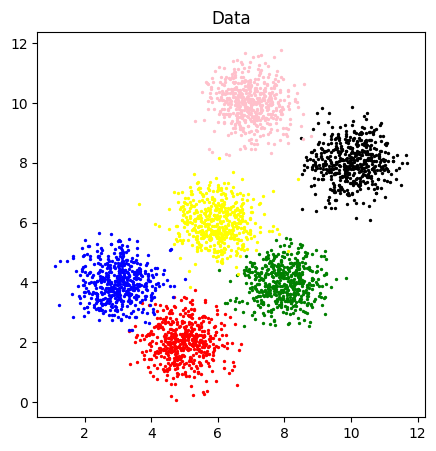

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import U_K_means as ukm
from WUOFC import wuofc_algorithm
import time
from sklearn import datasets
from sklearn.decomposition import PCA
'''
PCA = Principal Component Analysis ; to reduce the dimension of dataset
data can have big dimension and the calcualtion can be complex
we want to remove the eninformative info whata we have.
it using variance, the most variance the more information i have.
'''


%load_ext autoreload
%autoreload 2

np.random.seed(0)

no_samples = 3000
dim = 2
no_groups = 6

mus_list = [np.array([5,2]), np.array([3,4]), np.array([8,4]), np.array([6,6]),
             np.array([10,8]), np.array([7,10])]
sigmas_list = [0.4*np.eye(dim) for _ in range(no_groups)]

prior_probs = None

assert len(mus_list) == len(sigmas_list)
assert len(mus_list[0]) == dim
assert len(mus_list) == no_groups

data_dict = utils.create_data(mus_list, sigmas_list, no_samples = no_samples)
"""
will have a dic of {mu,sigma} and all the samples, with centre of mu and spread of sigma
The area within 1 standard deviation (roughly 68% of the points) will be a circle of radius 1 around the center.
The area within 2 standard deviations (roughly 95% of the points) will be a circle of radius 2.
The area within 3 standard deviations (roughly 99.7% of the points) will be a circle of radius 3.
"""

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
utils.plot_data(data_dict, ax_to_plot=ax)



In [ ]:
data = np.vstack(tuple(data_dict.values()))
start_time = time.time()
clust_cen, u, alpha, u_history, clust_cen_history = ukm.U_K_means(data, t_max=20)

utils.plot_evaluation_ukm(data, clust_cen_history, u_history)



In [ ]:
AV_AR, AV_time, sucess_pct = utils.calculate_AV_AR(data_dict, data, mus_list, 6)

print(f" for UOFC")
AV_AR, AV_time, sucess_pct = utils.calculate_AV_AR_WUOFC(data_dict, data, mus_list, 6)




Example 1 via WUOFC

Cluster number 2 SW is: 0.503359815735369
Cluster number 3 SW is: 0.49464565985191256
Cluster number 4 SW is: 0.49304851234926145
Cluster number 5 SW is: 0.573489110431003
Cluster number 6 SW is: 0.6272717305023333
Cluster number 7 SW is: 0.5675428633871986
Cluster number 8 SW is: 0.5260788386109512
Cluster number 9 SW is: 0.5216429886294335
Cluster number 10 SW is: 0.46601431716292974
Cluster number 11 SW is: 0.4713768060922991

 best SW is: 0.6272717305023333 for cluster: 6

CH Scores by Line:
Cluster number 2: CH is 427.0092845449468
Cluster number 3: CH is 458.5657184930052
Cluster number 4: CH is 414.9850618432306
Cluster number 5: CH is 608.018095290016
Cluster number 6: CH is 953.4943828447228
Cluster number 7: CH is 847.6796069522665
Cluster number 8: CH is 775.0864596991632
Cluster number 9: CH is 709.836637034773
Cluster number 10: CH is 679.985476770312
Cluster number 11: CH is 644.2780633755812

 best CH is: 953.4943828447228 for cluster: 6  

DB Scores by Line:
Cluster num

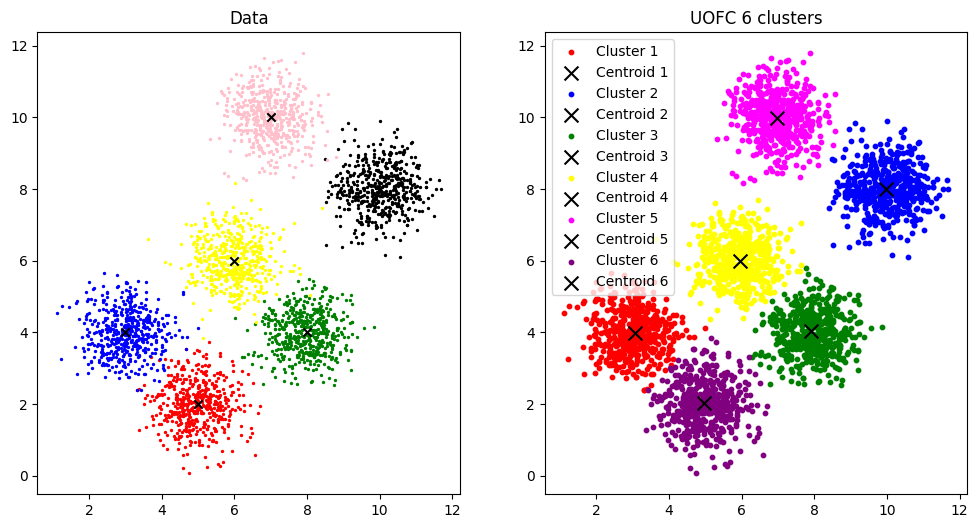

In [3]:

list_of_colors_1 = ['red', 'blue', 'green', 'yellow', 'fuchsia']
list_of_colors_2 = ['purple', 'orange', 'pink', 'brown', 'grey', "magenta", "cyan", "orange", "lime", "indigo",
                    "maroon", "olive", "navy", "teal", "aqua", "black","silver", "gold", "peru", "orchid"]
list_of_colors = list_of_colors_1 + list_of_colors_2
data = np.vstack(list(data_dict.values()))
Kmax = 10
q = 1.5

start_time = time.time()
best_cntrs, best_membership, Kopt, validity_scores  = wuofc_algorithm(data, Kmax, q)
print("Time taken: ", (time.time()-start_time)*1.5)


cluster_assignments = np.argmax(best_membership, axis=0)





if dim==2:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    utils.plot_data(data_dict, ax_to_plot=axes.reshape(-1)[0], mus_list=mus_list)
    ax_to_plot=axes.reshape(-1)[1]

    
    for j in range(Kopt):
        ax_to_plot.scatter(data[cluster_assignments == j, 0], data[cluster_assignments == j, 1],s=10, color=list_of_colors[j % len(list_of_colors)], label=f"Cluster {j + 1}")
        ax_to_plot.scatter(best_cntrs[j, 0], best_cntrs[j, 1], color='k', marker='x', s=100, label=f"Centroid {j + 1}")
    ax_to_plot.set_title(f"UOFC {Kopt} clusters")
    ax_to_plot.legend()



### Example 2: Mixture of 9 2D non-gaussian distributions

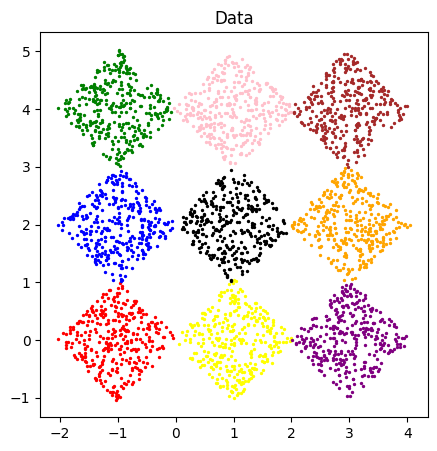

In [4]:

theta = np.pi/4
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
no_of_points = 3000
no_of_clusters = 9
no_of_samples_per_cluster = no_of_points//no_of_clusters


data_dict = {}
data_mus = []
for x in np.arange(-1,4,2):
    for y in np.arange(0,5,2):
        data_mus.append(np.array([x,y]))
        data_dict[str(x) + str(y)] = (np.dot(1.5*(np.array([-0.5,-0.5]) + np.random.rand(no_of_samples_per_cluster,2)), rot_matrix)
                                       + np.array([x,y]).reshape(1,-1))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
utils.plot_data(data_dict, ax_to_plot=ax)



In [ ]:
data = np.vstack(tuple(data_dict.values()))
start_time = time.time()
clust_cen, u, alpha, u_history, clust_cen_history = ukm.U_K_means(data, t_max=20)
print("Time taken for the U-K-means algorithm: ", time.time() - start_time)
utils.plot_evaluation_ukm(data, clust_cen_history, u_history)


In [ ]:
AV_AR, AV_time, succes_pct = utils.calculate_AV_AR(data_dict, data, data_mus, 9)
print()
AV_AR, AV_time, succes_pct = utils.calculate_AV_AR_WUOFC(data_dict, data, data_mus, 9)

    

Example 2 via WUOFC

In [ ]:
data = np.vstack(list(data_dict.values()))


start_time = time.time()
best_cntrs, best_membership, Kopt, validity_scores  = wuofc_algorithm(data, Kmax, q)
print("Time taken: ", ((time.time()-start_time)*1.5))

cluster_assignments = np.argmax(best_membership, axis=0)


if dim==2:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    utils.plot_data(data_dict, ax_to_plot=axes.reshape(-1)[0])
    ax_to_plot=axes.reshape(-1)[1]

    
    for j in range(Kopt):
        ax_to_plot.scatter(data[cluster_assignments == j, 0], data[cluster_assignments == j, 1],s=5, color=list_of_colors[j % len(list_of_colors)], label=f"Cluster {j + 1}")
        ax_to_plot.scatter(best_cntrs[j, 0], best_cntrs[j, 1], color='k', marker='x', s=100, label=f"Centroid {j + 1}")
    ax_to_plot.set_title(f"UOFC {Kopt} clusters")
    ax_to_plot.legend()

### Example 3: Iris Dataset
#### (3 clusters, 4 dimesions, 150 samples)

In [ ]:
iris = datasets.load_iris()
#plot the first PCA 3 dimensions of the iris dataset
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d', azim =110)
iris_pca = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris_pca[:,0], iris_pca[:,1], iris_pca[:,2], c=iris.target)
fig.suptitle("Iris dataset after PCA to 3 dimensions", fontsize=10)

data_dict = {}
data_mus = []
for i in range(3):
    data_dict[str(i)] = iris.data[iris.target == i]
    data_mus.append(np.mean(iris.data[iris.target == i], axis=0))

AV_AR, AV_time, success_pct = utils.calculate_AV_AR(data_dict, iris.data, data_mus,3, iterations=25, t_max=30)

print(f" for UOFC")
AV_AR, AV_time, success_pct = utils.calculate_AV_AR_WUOFC(data_dict, iris.data, data_mus,3, iterations=25, t_max=30)

    

Exapmle 3 via WUOFC

In [ ]:
data = np.vstack(list(data_dict.values()))
# Step 1: Dimensionality Reduction with PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions
data_reduced = pca.fit_transform(data)


start_time = time.time()
best_cntrs, best_membership, Kopt, validity_scores  = wuofc_algorithm(iris_pca, Kmax, q)
print("Time taken: ", ((time.time()-start_time)*1.5))

cluster_assignments = np.argmax(best_membership, axis=0)



# Step 3: Plotting the results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
colors = ['r', 'g', 'b']
for i in range(3):  # Assuming 3 clusters
    ax.scatter(data_reduced[cluster_assignments == i, 0], data_reduced[cluster_assignments == i, 1], data_reduced[cluster_assignments == i, 2], color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
ax.scatter(best_cntrs[:, 0], best_cntrs[:, 1], best_cntrs[:, 2], color='k', marker='x', s=100, label='Centroids')

ax.set_title('3D plot UOFC clustering of Iris dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# Inverting the axes for components 2 (Y-axis) and 1 (X-axis)
ax.set_xlim(4, -3)    # Invert Y-axis

ax.set_ylim(1.5, -1)  # Invert X-axis
ax.legend()


### Example 4: Seeds Datsaset
#### (3 clusters, 7 dimesions, 210 samples)

In [ ]:

import pandas as pd
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
seeds_df_og = pd.read_csv(SEEDS_DATA_URL, sep=r'\s+', header=None, names = ["A", "P", "C", "kernel_l", "kernel_w", "asym", "groove_l", "target"])

seeds_df_split = np.split(seeds_df_og, [7], axis = 1)

seeds_df = seeds_df_split[0]
seeds_df_target = seeds_df_split[1]
seeds_df.head()

#convert to numpy array
seeds_data = seeds_df.to_numpy()
seeds_target = seeds_df_target.to_numpy().flatten()


data_dict = {}
data_mus = []
for i in range(1,4):
    data_dict[str(i)] = seeds_data[seeds_target == i]
    data_mus.append(seeds_data[seeds_target == i].mean(axis=0))


AV_AR, AV_time, success_pct = utils.calculate_AV_AR(data_dict, seeds_data, data_mus, 3, iterations=25, t_max=30)

AV_AR, AV_time, success_pct = utils.calculate_AV_AR_WUOFC(data_dict, seeds_data, data_mus, 3, iterations=25, t_max=30)


Example 4 via WUOFC

In [ ]:
data = np.vstack(list(data_dict.values()))


start_time = time.time()
best_cntrs, best_membership, Kopt, validity_scores  = wuofc_algorithm(data, Kmax, q)
print("Time taken: ", ((time.time()-start_time)*1.5))


### Example 5: Sonar dataset
#### (2 clusters, 60 dimesions, 208 samples)


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 
  
# data (as pandas dataframes) 
X = connectionist_bench_sonar_mines_vs_rocks.data.features 
y = connectionist_bench_sonar_mines_vs_rocks.data.targets 

#chane the title of the class clomun of y to traget
y.columns = ['target']

print(type(y))
# replace the target values with 0 and 1
idxs = y.loc[y["target"] == "M"]
y.loc[idxs.index, "target"] = 0
idxs = y.loc[y["target"] == "R"]
y.loc[idxs.index, "target"] = 1


# print the dimesions of X and y
data = X.to_numpy()
target = y.to_numpy().flatten()



data_dict = {}
data_mus = []
for i in range(2):
    data_dict[str(i)] = data[target == i]
    data_mus.append(data[target == i].mean(axis=0))

AV_AR, AV_time, success_pct = utils.calculate_AV_AR(data_dict, data, data_mus, 2, iterations=25, t_max=30)

AV_AR, AV_time, success_pct = utils.calculate_AV_AR_WUOFC(data_dict, data, data_mus, 2, iterations=25, t_max=30)



In [ ]:
data = np.vstack(list(data_dict.values()))


start_time = time.time()
best_cntrs, best_membership, Kopt, validity_scores  = wuofc_algorithm(data, Kmax, q)
print("Time taken: ", ((time.time()-start_time)*1.5))